# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train is 0.0, E_test is 0.03953999999999998


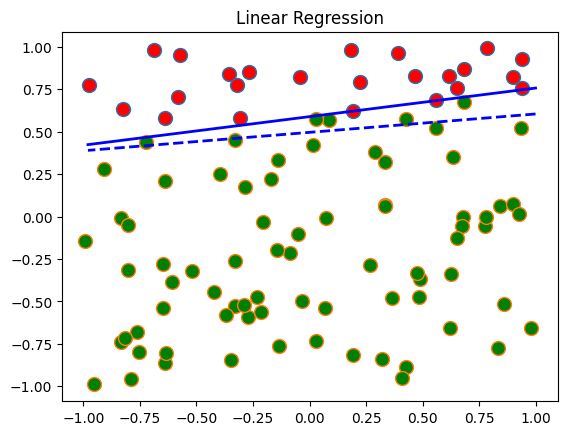

In [34]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    #TODO
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.mean(y_train_pred != y)
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_test += np.mean(y_test_pred != y)
     
E_train /= nRep
E_test /= nRep
# print('E_train is {}'.format(E_train))
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part2: Linear Regression: noisy

E_train is 0.09551999999999981, E_test is 0.13234000000000004


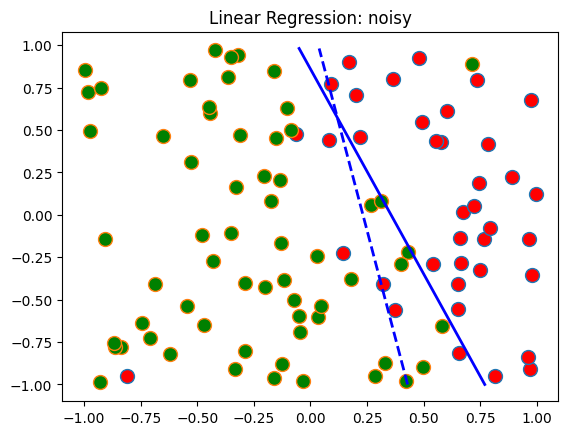

In [35]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y)
    #TODO
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.mean(y_train_pred != y)
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_test += np.mean(y_test_pred != y)
     
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part3: Linear Regression: poly_fit

In [49]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
#TODO
# Compute training, testing error
y_train_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_train = np.mean(y_train_pred != y)
y_test_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
E_test = np.mean(y_test_pred != y_test)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# plotdata(X, y, w, w, 'Linear Regression: poly_fit');
# plotdata(X_test, y_test, w, w, 'Linear Regression: poly_fit_test');
# poly_fit with transform
print('poly_fit...')
x1, x2 = X[0: ], X[1: ]
X_t = np.vstack((x1,x2,x1**2,x2**2,x1*x2))  # CHANGE THIS LINE TO DO TRANSFORMATION
x1_test, x2_test = X_test[0: ], X_test[1: ]
X_test_t = np.vstack((x1_test,x2_test,x1_test**2,x2_test**2,x1_test*x2_test))  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# #TODO
# Compute training, testing error
y_train_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t))))
E_train_t = np.mean(y_train_pred != y)
y_test_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))))
E_test_t = np.mean(y_test_pred != y_test)
print('E_train_t is {}, E_test_t is {}'.format(E_train_t, E_test_t))

E_train is 0.49, E_test is 0.5496
poly_fit...
E_train_t is 0.05, E_test_t is 0.066


## Part4: Logistic Regression

E_train is 0.0, E_test is 0.0


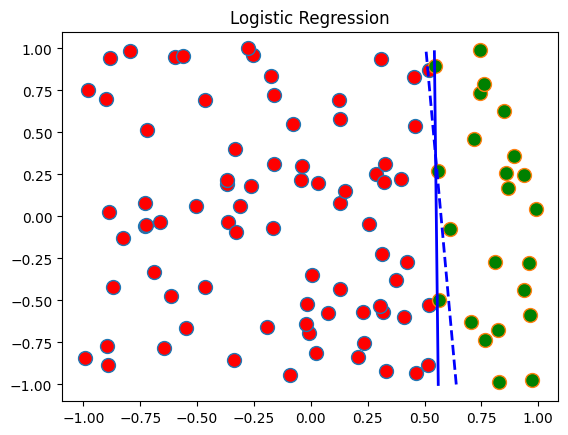

In [44]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y)
    #TODO
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.mean(y_train_pred != y)
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_test += np.mean(y_train_pred != y)
     
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

E_train is 0.09545299999999987, E_test is 0.09545299999999987


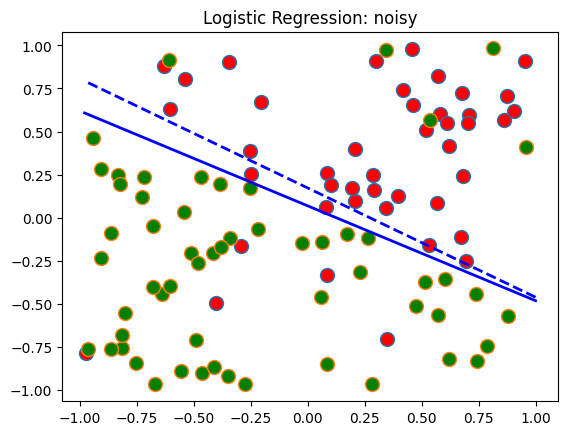

In [ ]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    #TODO
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.mean(y_train_pred != y)
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_test += np.mean(y_train_pred != y)
     
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

E_train is 0.0, E_test is 0.0
Average number of support vectors is 2.994.


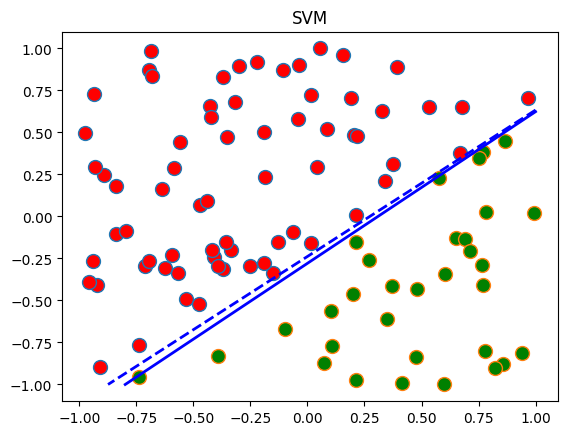

In [60]:
from svm import svm

nRep = 1000; # number of replica tes
nTrain = 100; # number of training data

E_train = 0
E_test = 0
Num = 0 # number of support vectors
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    #TODO
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.mean(y_train_pred != y)
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_test += np.mean(y_train_pred != y)
    # Sum up number of support vectors
    Num += num_sc

E_train /= nRep
E_test /= nRep
avgNum = Num / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

## Part7: Preceptron

E_train is 0.0, E_test is 0.0
Average number of iterations is 6.246.


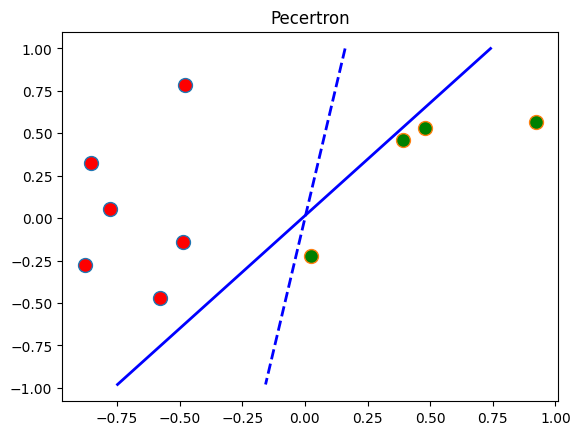

In [70]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 10 # number of training data
E_train = 0
E_test = 0
num_iter = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    #TODO
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += np.mean(y_train_pred != y)
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_test += np.mean(y_train_pred != y)
    # Sum up number of iterations
    num_iter += iters

E_train /= nRep
E_test /= nRep
avgIter = num_iter / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

## Part8: Preceptron: Non-linearly separable case

E_train is 0.09, E_test is 0.09
Average number of iterations is 1001.


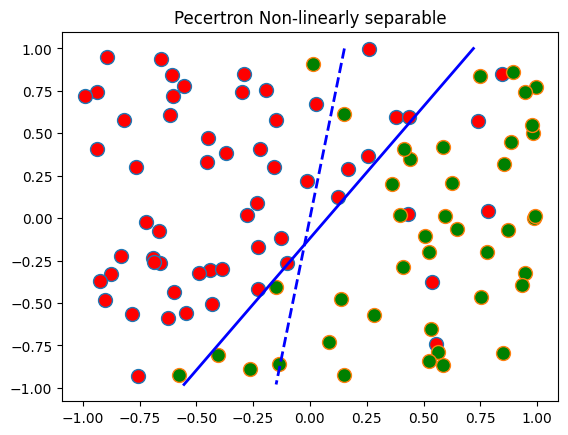

In [64]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
#TODO
y_train_pred = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_train = np.mean(y_train_pred != y)
y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_test = np.mean(y_train_pred != y)
avgIter = iters
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')
